### ライブラリ

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import hmean
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score

### データ

In [5]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(y_col, axis=1)
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 精度指標

- 分類器の精度指標

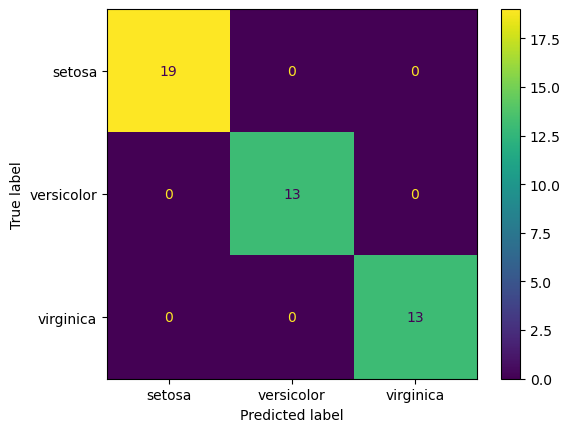

In [9]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [13]:
# Accuracy
y_true = np.random.choice([0, 1], size=10)
y_pred = np.random.choice([0, 1], size=10)
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.6

In [17]:
# Precision
precision = precision_score(y_true, y_pred)
precision

0.7142857142857143

In [19]:
# Recall
recall = recall_score(y_true, y_pred)
recall

0.7142857142857143

In [22]:
# specificity
specificity = recall_score(y_true, y_pred, pos_label=0)
specificity

0.3333333333333333

- precision_recall_curve

In [42]:
# データ
df = pd.read_csv('/Users/hisashi/Desktop/git-hub/python-lib-training/data/heart_preprocessed.csv')
y_col = 'target'
X = df.drop(y_col, axis=1)
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)
y_pred_proba[:10]

array([[0.08375537, 0.91624463],
       [0.01456661, 0.98543339],
       [0.07420905, 0.92579095],
       [0.93867954, 0.06132046],
       [0.99839118, 0.00160882],
       [0.04724517, 0.95275483],
       [0.43371721, 0.56628279],
       [0.51922223, 0.48077777],
       [0.3065824 , 0.6934176 ],
       [0.99459386, 0.00540614]])

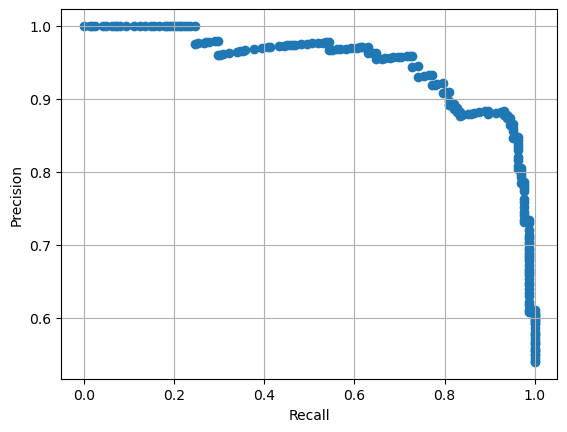

In [43]:
# precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
plt.scatter(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

- 閾値設定

In [52]:
# F1 score
f1 = f1_score(y_true, y_pred)

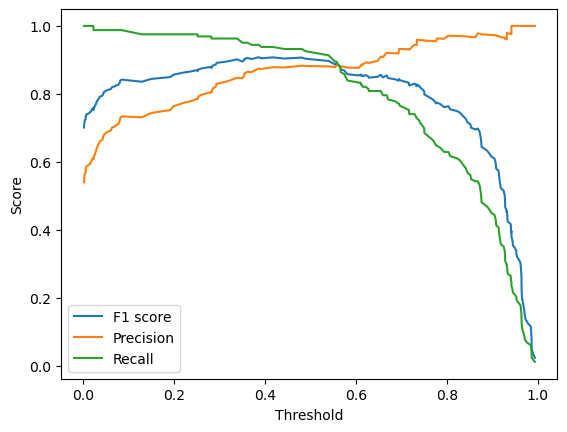

In [57]:
# threshold vs F1 score
f1_scores = [hmean([p,r]) for p, r in zip(precision, recall)]
plt.plot(thresholds, f1_scores[:-1], label='F1 score')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()